# 2022 NZMSA Data Science Submission.

In [1]:
import pandas as pd
import seaborn as sns
import datetime

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

%matplotlib inline

# Exploratory Data Analysis.

In [2]:
dataset = pd.read_csv("weather-data.csv", parse_dates=["valid"])
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30:00,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30:00,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00:00,21.0,12.0,56.38,16.0,NaN,NaN


In [3]:
## Numerical analysis
# count : Count number of non-NA/null observations.
# mean  : Mean of the values.
# std   : Standard deviation of the observations
# min   : Minimum of the values in the dataset
# max   : Maximum of the values in the dataset
dataset.describe()

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


<AxesSubplot:>

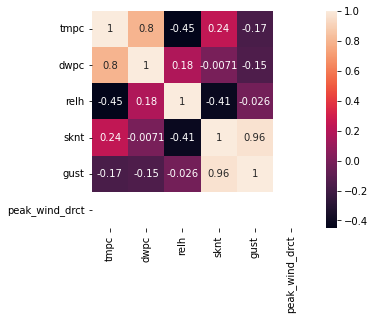

In [4]:
## Graphical Analysis
# calculate correlation matrix
corrMatrix = dataset.corr()

# plot correlation heatmap
sns.heatmap(corrMatrix, annot=True, square=True)

In [5]:
# Initial size of the data is too large, therefore reduce dataset to semi-monthly averages
redData = dataset.set_index('valid')
redData = redData.resample("SM").mean()
redData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2014-12-31 to 2020-12-15
Freq: SM-15
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tmpc            144 non-null    float64
 1   dwpc            144 non-null    float64
 2   relh            144 non-null    float64
 3   sknt            144 non-null    float64
 4   gust            131 non-null    float64
 5   peak_wind_drct  0 non-null      float64
dtypes: float64(6)
memory usage: 7.9 KB


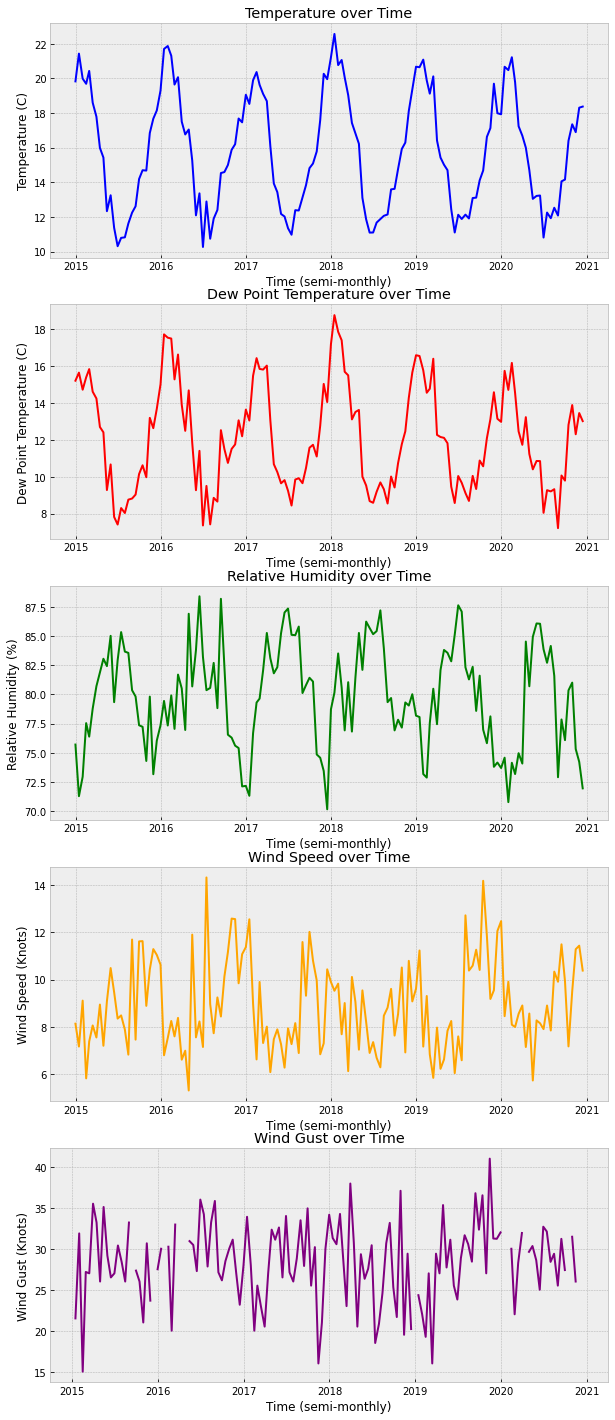

In [6]:
## Plot the data over time
plt.style.use("bmh")
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, squeeze=True)

# Temperature
ax1.plot(redData.index, redData["tmpc"], color="blue")
ax1.set_title("Temperature over Time")
ax1.set_xlabel("Time (semi-monthly)")
ax1.set_ylabel("Temperature (C)")

# Dew point temperature
ax2.plot(redData.index, redData["dwpc"], color="red")
ax2.set_title("Dew Point Temperature over Time")
ax2.set_xlabel("Time (semi-monthly)")
ax2.set_ylabel("Dew Point Temperature (C)")

# Relative humidity
ax3.plot(redData.index, redData["relh"], color="green")
ax3.set_title("Relative Humidity over Time")
ax3.set_xlabel("Time (semi-monthly)")
ax3.set_ylabel("Relative Humidity (%)")

# Wind speed
ax4.plot(redData.index, redData["sknt"], color="orange")
ax4.set_title("Wind Speed over Time")
ax4.set_xlabel("Time (semi-monthly)")
ax4.set_ylabel("Wind Speed (Knots)")

# Wind gusts
ax5.plot(redData.index, redData["gust"], color="purple")
ax5.set_title("Wind Gust over Time")
ax5.set_xlabel("Time (semi-monthly)")
ax5.set_ylabel("Wind Gust (Knots)")

fig.set_size_inches(10,25)

# uncomment code below if figure not being displayed in your machine
# fig.show()

# Comments
Considering that we are analysing data over the span of 6 years and the type of data we are interested in, we can safely presume to use time series analysis.

The temperature, dew point temperature and relative humidity all seem to be fairly seasonal, with the behaviour of the relative humidity acting inversely to the two temperature data sets. The two temperature graphs seem very closely correlated which is supported by the heat map with r=0.8.

The data for wind speed and gusts is a bit more jagged and unclear for interpretation. Smoothing out these graphs by getting monthly averages may provide more insight:

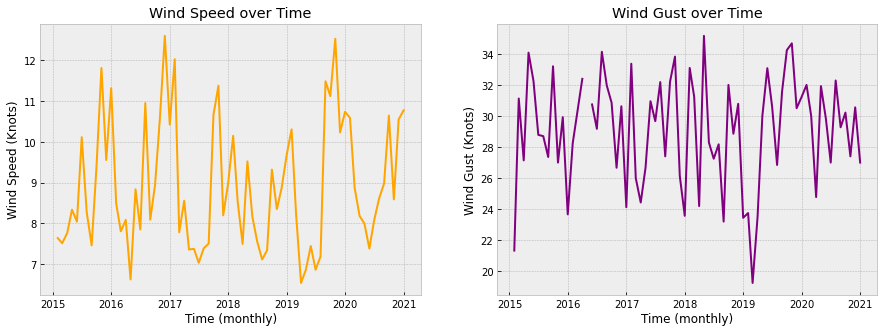

In [7]:
# Resampling to monthly averages
redData2 = dataset.set_index("valid")
redData2 = redData2.resample('M').mean()

fig, (ax6, ax7) = plt.subplots(nrows=1, ncols=2, squeeze=True)

# Wind speed
ax6.plot(redData2.index, redData2["sknt"], color="orange")
ax6.set_title("Wind Speed over Time")
ax6.set_xlabel("Time (monthly)")
ax6.set_ylabel("Wind Speed (Knots)")

# Wind gusts
ax7.plot(redData2.index, redData2["gust"], color="purple")
ax7.set_title("Wind Gust over Time")
ax7.set_xlabel("Time (monthly)")
ax7.set_ylabel("Wind Gust (Knots)")

fig.set_size_inches(15,5)

# Comments - continued
Now that the data is slightly smoother the seasonal behaviour of wind speed and gust is more apparent.

Wind speed seems to peak around the start of each new year and dips during the middle of the year lining up with the behaviour observed in the temperature graphs.

Wind gust on the other hand seems to demonstrate an inverse behaviour to wind speed although not quite having extreme crests and troughs as wind speed. Regardless of the inverse relationship, wind speed and gust should be naturally correlated which is also supported by the heat map with r=0.96.

Overall, there does not seem to be any observable trend in any category over time.

# Data Processing
In the exploratory data analysis, some data modification occured to make visual analysis easier. However for the purpose of maximising the number of data inputs we have, we will reuse the initial dataset with only the empty column "peak_wind_drct" removed as it has no data to model. 

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0    station        103713 non-null  object        
 1   valid           103713 non-null  datetime64[ns]
 2   tmpc            103678 non-null  float64       
 3   dwpc            103678 non-null  float64       
 4   relh            103593 non-null  float64       
 5   sknt            103704 non-null  float64       
 6   gust            1203 non-null    float64       
 7   peak_wind_drct  0 non-null       float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 6.3+ MB


In [9]:
# Remove non-numerical categories: station and peak_wind_drct
modelDataset = dataset.drop(columns=[" station", "peak_wind_drct"])

# Remove gust due to small data pool
modelDataset.drop(columns=["gust"], inplace=True)

modelDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   valid   103713 non-null  datetime64[ns]
 1   tmpc    103678 non-null  float64       
 2   dwpc    103678 non-null  float64       
 3   relh    103593 non-null  float64       
 4   sknt    103704 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.0 MB


In [10]:
# Remove null rows to make categories equal in size
modelDataset.dropna(inplace=True)

modelDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103584 entries, 0 to 103712
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   valid   103584 non-null  datetime64[ns]
 1   tmpc    103584 non-null  float64       
 2   dwpc    103584 non-null  float64       
 3   relh    103584 non-null  float64       
 4   sknt    103584 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.7 MB


In [11]:
# Essentially convert valid date and time to numerical format for model fitting/scoring
modelDataset["year"] = modelDataset["valid"].dt.year
modelDataset["month"] = modelDataset["valid"].dt.month
modelDataset["day"] = modelDataset["valid"].dt.day

modelDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103584 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   valid   103584 non-null  datetime64[ns]
 1   tmpc    103584 non-null  float64       
 2   dwpc    103584 non-null  float64       
 3   relh    103584 non-null  float64       
 4   sknt    103584 non-null  float64       
 5   year    103584 non-null  int64         
 6   month   103584 non-null  int64         
 7   day     103584 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 7.1 MB


In [12]:
modelDataset.head(-1)

,valid,tmpc,dwpc,relh,sknt,year,month,day
0,2015-01-01 00:00:00,21.0,11.0,52.77,15.0,2015,1,1
1,2015-01-01 00:30:00,21.0,10.0,49.37,16.0,2015,1,1
2,2015-01-01 01:00:00,21.0,12.0,56.38,16.0,2015,1,1
3,2015-01-01 01:30:00,21.0,13.0,60.21,16.0,2015,1,1
4,2015-01-01 02:00:00,21.0,12.0,56.38,16.0,2015,1,1
...,...,...,...,...,...,...,...,...
103707,2020-12-30 21:00:00,18.0,14.0,77.45,5.0,2020,12,30
103708,2020-12-30 21:30:00,19.0,14.0,72.74,5.0,2020,12,30
103709,2020-12-30 22:00:00,19.0,14.0,72.74,6.0,2020,12,30
103710,2020-12-30 22:30:00,20.0,14.0,68.35,6.0,2020,12,30


In [13]:
## Creating train and test data sets
xTrain, xTest, yTrain, yTest = train_test_split(modelDataset.select_dtypes(include=["int64"]), modelDataset.select_dtypes(include=["float64"]), test_size=0.2)

In [14]:
xTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82867 entries, 47302 to 31461
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    82867 non-null  int64
 1   month   82867 non-null  int64
 2   day     82867 non-null  int64
dtypes: int64(3)
memory usage: 2.5 MB


In [15]:
xTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20717 entries, 17703 to 16165
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    20717 non-null  int64
 1   month   20717 non-null  int64
 2   day     20717 non-null  int64
dtypes: int64(3)
memory usage: 647.4 KB


In [16]:
yTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82867 entries, 47302 to 31461
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpc    82867 non-null  float64
 1   dwpc    82867 non-null  float64
 2   relh    82867 non-null  float64
 3   sknt    82867 non-null  float64
dtypes: float64(4)
memory usage: 3.2 MB


In [17]:
yTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20717 entries, 17703 to 16165
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpc    20717 non-null  float64
 1   dwpc    20717 non-null  float64
 2   relh    20717 non-null  float64
 3   sknt    20717 non-null  float64
dtypes: float64(4)
memory usage: 809.3 KB


# Data Modelling

In [18]:
# An exhaustive list of models can be found in sci-kit learn in this link: https://scikit-learn.org/stable/supervised_learning.html
# The url takes you to supervised learning which is what you will be dealing with for this phase.


# Create and fit model
model = LinearRegression()
model.fit(xTrain, yTrain)

LinearRegression()

In [19]:
# Test model
model.score(xTest, yTest)

0.0605977540469321

In [20]:
# Create prediction array to predict another month of the existing dataset.
predPeriod = []
for i in range(1,31):
    predPeriod.append([2020, 12, i])


In [21]:
# Get the predicted means of the data during the last month
predDF = pd.DataFrame(model.predict(predPeriod),columns=["pTmpc", "pDwpc", "pRelh", "pSknt"])
predMeans = predDF.mean()
predMeans

c:\Users\sambo\Coding\NZMSA\2022-Phase-2\3. Data Science\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


pTmpc    13.724817
pDwpc     9.993404
pRelh    79.196129
pSknt    10.046256
dtype: float64

In [22]:
# Get the actual means of the data during the last month
trueDF = modelDataset.set_index("valid")
trueDF = trueDF[trueDF.last_valid_index()-pd.DateOffset(29, "D"):]
trueDF.drop(columns=["year", "month", "day"], inplace=True)
trueMeans = trueDF.mean()
trueMeans

tmpc    18.346074
dwpc    13.126477
relh    72.513370
sknt    10.776233
dtype: float64

In [23]:
# Prediction vs true
cats = ["tmpc","dwpc","relh","sknt"]
for i in cats:
    diffMean = trueMeans[i]-predMeans["p"+i.capitalize()]
    print(f"Difference in mean {i} is {diffMean}")



Difference in mean tmpc is 4.621256894800382
Difference in mean dwpc is 3.1330730104522413
Difference in mean relh is -6.682758696319283
Difference in mean sknt is 0.729977474591534


# Conclusion

Overall, despite the small difference between the predicted and true mean for the last month observed, the model itself consistently has a very low score typically <0.1. Therefore, it is not very reliable for predicting future weather.